In [1]:
max_max = 400

In [2]:
#!/usr/bin/python3
from sklearn.svm import OneClassSVM
import pandas as pd
import feather
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import pickle
np.random.seed(500)
import time
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import os

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold

In [4]:
# from os import listdir
# from os.path import isfile, join
# dec_directory ="/home/parallels/KTH/II2202/deception_dataset/hotel/merged/Deceptive"
# dec_directory2 ="/home/parallels/KTH/II2202/deception_dataset/hotel/merged/Deceptive2"
# dec_directory3 ="/home/parallels/KTH/II2202/deception_dataset/hotel/merged/Deceptive3"

# genuine_directory = "/home/parallels/KTH/II2202/deception_dataset/hotel/merged/Truthful"
# deceptive_files = [f for f in listdir(dec_directory) if isfile(join(dec_directory, f))]
# deceptive_files2 = [f for f in listdir(dec_directory2) if isfile(join(dec_directory2, f))]
# deceptive_files3 = [f for f in listdir(dec_directory3) if isfile(join(dec_directory3, f))]

# genuine_files = [f for f in listdir(genuine_directory) if isfile(join(genuine_directory, f))]
# df_list = []

# for deceit in deceptive_files:
#     file_path = join( dec_directory, deceit )
#     df_list.append(pd.read_table(file_path,header = None,sep= 'thisisimpossible',engine='python',error_bad_lines=False,index_col=False ).assign(label=-1))

# for deceit in deceptive_files2:
#     file_path = join( dec_directory2, deceit )
#     df_list.append(pd.read_table(file_path,header = None,sep= 'thisisimpossible',engine='python',error_bad_lines=False,index_col=False ).assign(label=-1))
    
# for deceit in deceptive_files3:
#     file_path = join( dec_directory3, deceit )
#     df_list.append(pd.read_table(file_path,header = None,sep= 'thisisimpossible',engine='python',error_bad_lines=False,index_col=False ).assign(label=-1))
    

# for genuine in genuine_files:
#     file_path = join( genuine_directory, genuine )
#     df_list.append(pd.read_table(file_path,header = None,sep= 'thisisimpossible',engine='python',error_bad_lines=False,index_col=False ).assign(label=1))

    
# df = pd.concat(df_list, ignore_index=True)


# # df = pd.read_table("Data/YelpChi/output_review_yelpHotelData_NRYRcleaned.txt",header=None)
# # df2 = pd.read_table("Data/YelpChi/output_meta_yelpHotelData_NRYRcleaned.txt",header=None, sep=" ")
# # df['label'] =  df2[4]
# # df['label'] = df['label'].replace(['N'],1)
# # df['label'] = df['label'].replace(['Y'],-1)
# df.columns = ['review_content', 'label']


pickle_in = open("df_hotel.pickle","rb")
df = pickle.load(pickle_in)

In [5]:
df

,review_content,label,tokenized,text_final
0,stayed here for a conference and it was a very...,-1,"[stayed, here, for, a, conference, and, it, wa...","['stay', 'conference', 'bad', 'experience', 'f..."
1,elegant and modernized hotel with great staff....,-1,"[elegant, and, modernized, hotel, with, great,...","['elegant', 'modernized', 'hotel', 'great', 's..."
2,we were extremely pleased with our beautiful c...,-1,"[we, were, extremely, pleased, with, our, beau...","['extremely', 'pleased', 'beautiful', 'cabana'..."
3,the experience turned even more sour when the ...,-1,"[the, experience, turned, even, more, sour, wh...","['experience', 'turn', 'even', 'sour', 'staff'..."
4,i was expecting more empathy and a better reso...,-1,"[i, was, expecting, more, empathy, and, a, bet...","['expect', 'empathy', 'good', 'resolution', 'r..."
...,...,...,...,...
1891,my wife and i stayed here in the middle of feb...,1,"[my, wife, and, i, stayed, here, in, the, midd...","['wife', 'stay', 'middle', 'february', 'take',..."
1892,visiting during a busy 2day conference in chic...,1,"[visiting, during, a, busy, 2day, conference, ...","['visit', 'busy', 'conference', 'chicago', 'ho..."
1893,where do i start. the gm was a nice guy for ha...,1,"[where, do, i, start, ., the, gm, was, a, nice...","['start', 'gm', 'nice', 'guy', 'handle', 'inci..."
1894,the omni is in a fabulous location on michigan...,1,"[the, omni, is, in, a, fabulous, location, on,...","['omni', 'fabulous', 'location', 'michigan', '..."


In [52]:
pos=0 
neg = 0

for x in df['label']:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent deceptive', neg*100.0/(neg+pos)) 

negative:  1096  positive: 800 total 1896 percent deceptive 57.80590717299578


In [7]:
#file_path = '/home/parallels/KTH/II2202/Data/YelpNYC/database_feather.feather'
#df = pd.read_feather(file_path, columns=None, use_threads=True)

In [8]:
df.dtypes

review_content    object
label              int64
tokenized         object
text_final        object
dtype: object

In [9]:
df.describe()

,label
count,1896.000000
mean,-0.156118
std,0.987999
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,1.000000
max,1.000000


In [10]:
# # Step - a : Remove blank rows if any.
# df['review_content'].dropna(inplace=True)

In [11]:
# # Step - b : Change all the text to lower case
# df['review_content'] = [entry.lower() for entry in df['review_content']]

In [12]:
# # Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
# # tokenized = []
# # for index,entry in enumerate(genuine['review_content']): 
# #     genuine.loc[index,'tokenized'] = [word_tokenize(entry)]
# #     percent = index/len(genuine)*100
# #     print('percent done [%d%%]\r'%percent, end="")
# df['tokenized']= [word_tokenize(entry) for entry in df['review_content']]

In [13]:
# # Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# # WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
# tag_map = defaultdict(lambda : wn.NOUN)
# tag_map['J'] = wn.ADJ
# tag_map['V'] = wn.VERB
# tag_map['R'] = wn.ADV
# final_text = [None]*len(df['tokenized'])
# for index,entry in enumerate(df['tokenized']):
#     # Declaring Empty List to store the words that follow the rules for this step
#     Final_words = []
#     # Initializing WordNetLemmatizer()
#     percent = float(index/len(df['tokenized'])*100)

#     print('percent done [%f%%]\r'%percent, end="")
#     word_Lemmatized = WordNetLemmatizer()
#     # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
#     for word, tag in pos_tag(entry):
#         # Below condition is to check for Stop words and consider only alphabets
#         if word not in stopwords.words('english') and word.isalpha():
#             word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
#             Final_words.append(word_Final)
#     # The final processed set of words for each iteration will be stored in 'text_final'
#     df.loc[index,'text_final'] = str(Final_words)
#     final_text[index]=(Final_words)
    


In [14]:
# #to save the preporcessed list

# pickle_out = open("df_hotel.pickle","wb")
# pickle.dump(df, pickle_out)
# pickle_out.close()

In [15]:
df

,review_content,label,tokenized,text_final
0,stayed here for a conference and it was a very...,-1,"[stayed, here, for, a, conference, and, it, wa...","['stay', 'conference', 'bad', 'experience', 'f..."
1,elegant and modernized hotel with great staff....,-1,"[elegant, and, modernized, hotel, with, great,...","['elegant', 'modernized', 'hotel', 'great', 's..."
2,we were extremely pleased with our beautiful c...,-1,"[we, were, extremely, pleased, with, our, beau...","['extremely', 'pleased', 'beautiful', 'cabana'..."
3,the experience turned even more sour when the ...,-1,"[the, experience, turned, even, more, sour, wh...","['experience', 'turn', 'even', 'sour', 'staff'..."
4,i was expecting more empathy and a better reso...,-1,"[i, was, expecting, more, empathy, and, a, bet...","['expect', 'empathy', 'good', 'resolution', 'r..."
...,...,...,...,...
1891,my wife and i stayed here in the middle of feb...,1,"[my, wife, and, i, stayed, here, in, the, midd...","['wife', 'stay', 'middle', 'february', 'take',..."
1892,visiting during a busy 2day conference in chic...,1,"[visiting, during, a, busy, 2day, conference, ...","['visit', 'busy', 'conference', 'chicago', 'ho..."
1893,where do i start. the gm was a nice guy for ha...,1,"[where, do, i, start, ., the, gm, was, a, nice...","['start', 'gm', 'nice', 'guy', 'handle', 'inci..."
1894,the omni is in a fabulous location on michigan...,1,"[the, omni, is, in, a, fabulous, location, on,...","['omni', 'fabulous', 'location', 'michigan', '..."


In [16]:
x = df['text_final'].values.reshape(-1,1)
y = df['label'].values.reshape(-1,1)
y.shape

(1896, 1)

In [17]:
#undersample = RandomUnderSampler(sampling_strategy='majority')
undersample = RandomUnderSampler(sampling_strategy='majority')
#oversample = RandomOverSampler(sampling_strategy='minority')
X_under, y_under = undersample.fit_resample(x, y)
#X_over, y_over = oversample.fit_resample(X, df['label'])

In [18]:
d = {'text_final':X_under[:,0],'label':y_under[:,]}
dfu = pd.DataFrame(d)

In [19]:
dfu

,text_final,label
0,"['let', 'website', 'fool', 'stay', 'amalfi', '...",-1
1,"['wife', 'stay', 'allegro', 'weekend', 'busine...",-1
2,"['many', 'hotel', 'chicago', 'many', 'hotel', ...",-1
3,"['one', 'expensive', 'hotel', 'ithaca', 'area'...",-1
4,"['talbot', 'hotel', 'elegant', 'place', 'take'...",-1
...,...,...
1595,"['wife', 'stay', 'middle', 'february', 'take',...",1
1596,"['visit', 'busy', 'conference', 'chicago', 'ho...",1
1597,"['start', 'gm', 'nice', 'guy', 'handle', 'inci...",1
1598,"['omni', 'fabulous', 'location', 'michigan', '...",1


In [20]:
pos=0 
neg = 0
for x in dfu['label']:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent deceptive', neg*100.0/(neg+pos)) 

negative:  800  positive: 800 total 1600 percent deceptive 50.0


In [21]:
Train_X_oc_all, Test_X_oc_all = model_selection.train_test_split(dfu[['label','text_final']],test_size=0.3,stratify=dfu['label'])

In [22]:
# check test genuine/deceptive
pos=0 
neg = 0

for x in Test_X_oc_all['label']:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent deceptive', neg*100.0/(neg+pos)) 

negative:  240  positive: 240 total 480 percent deceptive 50.0


In [23]:
# split using genuine
Train_X, Test_X = model_selection.train_test_split((df.loc[(df['label'] == 1)]).text_final,test_size=0.3)


In [24]:
len(Train_X)

560

In [25]:
#split using deceptive
Train_X_dec, Test_X_dec = model_selection.train_test_split((Train_X_oc_all.loc[(dfu['label'] == -1)]).text_final,test_size=0.3)

In [26]:
Tfidf_vect = TfidfVectorizer(max_features=max_max)        
Tfidf_vect.fit(df['text_final'])

TfidfVectorizer(max_features=400)

In [27]:
#vectorizing genuine data
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [28]:
# vectorizing deceptive data
Train_X_Tfidf_dec = Tfidf_vect.transform(Train_X_dec)
Test_X_Tfidf_dec = Tfidf_vect.transform(Test_X_oc_all['text_final'])

In [29]:
# vectorizing all data
Test_X_Tfidf_all = Tfidf_vect.transform(df['text_final'])

In [30]:
Train_X_Tfidf

<560x400 sparse matrix of type '<class 'numpy.float64'>'
	with 20631 stored elements in Compressed Sparse Row format>

In [31]:
# fit the training dataset on the classifier using [deceptive]
start_time = time.time()

clf_dec = OneClassSVM(gamma='auto', kernel='rbf', degree=5).fit(Train_X_Tfidf_dec)
elapsed_time = time.time() - start_time
print('elapsed_time' , elapsed_time)
# predict the labels on validation dataset

elapsed_time 0.03981781005859375


In [32]:
# predict using deceptive
start_time = time.time()
predictions_oneclass_dec = clf_dec.predict(Test_X_Tfidf_dec)
#print(predictions_oneclass_dec)
elapsed_time = time.time() - start_time
print('elapsed_time' , elapsed_time)
# Use accuracy_score function to get the accuracy

elapsed_time 0.031905174255371094


In [33]:
# deceptive predict count
pos=0 
neg = 0

for x in predictions_oneclass_dec:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos)       

negative:  289  positive: 191


In [34]:
cf_matrix=confusion_matrix(Test_X_oc_all['label'], predictions_oneclass_dec*-1)
metrics_result = precision_recall_fscore_support(Test_X_oc_all['label'], predictions_oneclass_dec*-1, average='weighted',zero_division=0)
print("Accuracy Score -> ",accuracy_score(predictions_oneclass_dec*-1, Test_X_oc_all['label'], normalize=True))
print("percision: ", metrics_result[0], ' recall: ' , metrics_result[1], ' fscore: ', metrics_result[2])
#print(metrics.f1_score(Test_X_oc_all['label'], predictions_oneclass_dec*-1, average='weighted'))
#sns.heatmap(cf_matrix, annot=True)

Accuracy Score ->  0.54375
percision:  0.5456530009601624  recall:  0.54375  fscore:  0.5389453462515186


<AxesSubplot:>

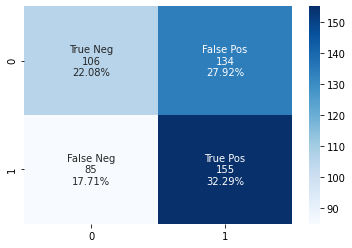

In [35]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


In [36]:
# fit the training dataset on the classifier using [genuine]
start_time = time.time()

clf_gen = OneClassSVM(gamma='auto', kernel='poly', degree=1).fit(Train_X_Tfidf)
elapsed_time = time.time() - start_time
print('elapsed_time' , elapsed_time)
# predict the labels on validation dataset

elapsed_time 0.09508275985717773


In [37]:
# predict using [genuine]
start_time = time.time()
predictions_oneclass_gen = clf_gen.predict(Test_X_Tfidf_dec)
#print(predictions_oneclass_gen)
elapsed_time = time.time() - start_time
print('elapsed_time' , elapsed_time)
# Use accuracy_score function to get the accuracy

elapsed_time 0.04801011085510254


In [38]:
# count of prediction using [genuine]
pos=0 
neg = 0

for x in predictions_oneclass_gen:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos)   

negative:  296  positive: 184


In [39]:
print("Accuracy Score -> ",accuracy_score(predictions_oneclass_gen, Test_X_oc_all['label'], normalize=True))

Accuracy Score ->  0.575


In [40]:
# # to save the classifier model

# pickle_out = open("clf_oneclass.pickle","wb")
# pickle.dump(clf, pickle_out)
# pickle_out.close()

In [41]:
X_train_all, X_validation_all, Y_train_all, Y_validation_all = train_test_split(Tfidf_vect.transform(dfu['text_final']), dfu['label'], test_size=0.65, random_state=1,stratify=dfu['label'] )

In [42]:
print(len(dfu['text_final']),len(Y_train_all))

1600 560


In [43]:
pos=0 
neg = 0
for x in Y_train_all:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent deceptive', neg*100.0/(neg+pos)) 

negative:  280  positive: 280 total 560 percent deceptive 50.0


In [44]:
# classifier checker

# your code
models = []
#models.append(['Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr'),[],0,0])
#models.append(['Linear Discriminant Analysis', LinearDiscriminantAnalysis(),[],0,0])
#models.append(['K Nearest Neighbor', KNeighborsClassifier(),[],0,0])
#models.append(['Decesion Tree Classifier', DecisionTreeClassifier(),[],0,0])
#models.append(['Gaussien Naive Bayes', GaussianNB(),[],0,0])
models.append(['Support Vector Machine', SVC(gamma='auto',kernel='rbf'),[],0,0])
models.append(['Support Vector Machine', SVC(gamma='auto',kernel='poly'),[],0,0])
models.append(['Support Vector Machine', SVC(gamma='auto',kernel='linear'),[],0,0])
#models.append(['Random Forest', RandomForestClassifier(max_depth = 1000,random_state=1),[],0,0])

models = np.array(models,dtype=object)

for i in range(len(models)):
    start_time = time.time()
    #kfold = StratifiedKFold(n_splits=1, random_state=1, shuffle=True)
    cv_results = cross_val_score(models[i,1], X_train_all, Y_train_all, scoring='accuracy')
    models[i,2] = cv_results
    models[i,3] = cv_results.mean()
    models[i,4] = cv_results.std()
    elapsed_time = time.time() - start_time
    print('%s: %f (%f) elapsed time: %f' % (models[i,0], models[i,3], models[i,4],elapsed_time))
    
    

best_model= models[np.argmax(models[:,3]),:]
print("the best model performer is: ", best_model[0])

Support Vector Machine: 0.775000 (0.051570) elapsed time: 0.499618
Support Vector Machine: 0.719643 (0.058847) elapsed time: 0.451702
Support Vector Machine: 0.798214 (0.028571) elapsed time: 0.357760
the best model performer is:  Support Vector Machine


In [45]:
clf_model=SVC(gamma='auto',kernel='linear',degree=2).fit(X_train_all, Y_train_all)

In [46]:
result=clf_model.predict(X_validation_all)

In [47]:
pos=0 
neg = 0
for x in result:
    if x == -1:
        neg+=1
    else:
        pos+=1
print ('negative: ', neg , ' positive:' , pos, 'total', neg+pos,'percent deceptive', neg*100.0/(neg+pos)) 

negative:  525  positive: 515 total 1040 percent deceptive 50.48076923076923


In [48]:
print("Accuracy Score -> ",accuracy_score(result, Y_validation_all, normalize=True))
metrics_result = precision_recall_fscore_support(Y_validation_all, result, average='binary',zero_division=0)
print("percision: ", metrics_result[0], ' recall: ' , metrics_result[1], ' fscore: ', metrics_result[2], '\n') 

Accuracy Score ->  0.7778846153846154
percision:  0.7805825242718447  recall:  0.7730769230769231  fscore:  0.7768115942028986 



In [49]:
# fit the training dataset on the classifier
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
degrees = [0,1,2,3]
classifiers = []
for kern in kernels:
    start_time = time.time()
    if kern == 'poly':
        for deg in degrees:
            start_time = time.time()
            clf_result = OneClassSVM( kernel=kern, degree=deg).fit(Train_X_Tfidf)
            elapsed_time = time.time() - start_time
            classifiers.append([kern,deg,clf_result,elapsed_time])
            print('kernel used: ' , kern, ' degree used: ' , deg, ' elapsed_time:' , elapsed_time)
            
    else:
        clf_result = OneClassSVM(gamma='auto', kernel=kern).fit(Train_X_Tfidf)
        elapsed_time = time.time() - start_time
        classifiers.append([kern,0,clf_result,elapsed_time])
        print('kernel used: ' , kern, ' elapsed_time: ' , elapsed_time)

# predict the labels on validation dataset

kernel used:  linear  elapsed_time:  0.0921783447265625
kernel used:  poly  degree used:  0  elapsed_time: 0.05991196632385254
kernel used:  poly  degree used:  1  elapsed_time: 0.08762669563293457
kernel used:  poly  degree used:  2  elapsed_time: 0.09639120101928711
kernel used:  poly  degree used:  3  elapsed_time: 0.11719822883605957
kernel used:  rbf  elapsed_time:  0.08744359016418457
kernel used:  sigmoid  elapsed_time:  0.08698606491088867


In [50]:
clas_result = []
for clas in classifiers:
    start_time = time.time()
    predict_result = clas[2].predict(Test_X_Tfidf_dec)
    elapsed_time = time.time() - start_time
    clas_result.append([clas[0],clas[1],clas[2],predict_result])
    acc = accuracy_score(predict_result*1, Test_X_oc_all['label'], normalize=True)
    metrics_result = precision_recall_fscore_support(Test_X_oc_all['label'], predict_result*1, average='binary',zero_division=0)
    print('kernel used: ' , clas[0], ' degree used:' , clas[1], ' elapsed_time: ' , elapsed_time, ' accuracy: ', acc)
    print("percision: ", metrics_result[0], ' recall: ' , metrics_result[1], ' fscore: ', metrics_result[2], '\n')  
# predict the labels on validation dataset

kernel used:  linear  degree used: 0  elapsed_time:  0.04443836212158203  accuracy:  0.5708333333333333
percision:  0.5934065934065934  recall:  0.45  fscore:  0.5118483412322274 

kernel used:  poly  degree used: 0  elapsed_time:  0.04950428009033203  accuracy:  0.5
percision:  0.0  recall:  0.0  fscore:  0.0 

kernel used:  poly  degree used: 1  elapsed_time:  0.04513216018676758  accuracy:  0.5708333333333333
percision:  0.5934065934065934  recall:  0.45  fscore:  0.5118483412322274 

kernel used:  poly  degree used: 2  elapsed_time:  0.05779910087585449  accuracy:  0.6125
percision:  0.684931506849315  recall:  0.4166666666666667  fscore:  0.5181347150259068 

kernel used:  poly  degree used: 3  elapsed_time:  0.08621621131896973  accuracy:  0.6520833333333333
percision:  0.9101123595505618  recall:  0.3375  fscore:  0.49240121580547114 

kernel used:  rbf  degree used: 0  elapsed_time:  0.047629356384277344  accuracy:  0.5708333333333333
percision:  0.5934065934065934  recall:  0.

<AxesSubplot:>

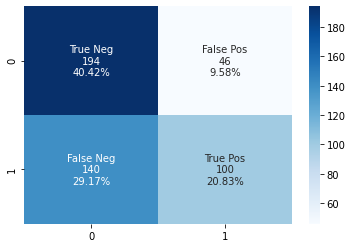

In [51]:
clf_result = OneClassSVM( kernel='poly', degree=2).fit(Train_X_Tfidf)
predict_result = clf_result.predict(Test_X_Tfidf_dec)

cf_matrix=confusion_matrix(Test_X_oc_all['label'], predict_result*1)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
